In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def calculate_metrics(confusion_matrices):
    precisions = []
    recalls = []
    f1_scores = []
    for confusion_matrix in confusion_matrices:
        tp = confusion_matrix.diagonal()
        fp = confusion_matrix.sum(axis=0) - tp
        fn = confusion_matrix.sum(axis=1) - tp
        tn = confusion_matrix.sum() - (tp + fp + fn)
        
        classwise_precisions = []
        classwise_recalls = []
        classwise_f1_scores = []
        for i in range(len(tp)):
            if(tp[i]+fp[i]==0 or tp[i]+fn[i]==0):
                # print(confusion_matrix,i)
                continue
            p = tp[i]/(tp[i]+fp[i])
            r = tp[i]/(tp[i]+fn[i])
            f1 = 2*p*r/(p+r)
            classwise_precisions.append(p)
            classwise_recalls.append(r)
            classwise_f1_scores.append(f1)
        precision = sum(classwise_precisions)/len(classwise_precisions)
        recall = sum(classwise_recalls)/ len(classwise_recalls)
        f1 = sum(classwise_f1_scores)/ len(classwise_f1_scores)
        
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    return {
        "f1_scores": f1_scores,
        "precisions": precisions,
        "recalls": recalls
    }

In [12]:
def get_accuracy(history,label = 'val_accuracy'):
    n = len(history)
    accuracy = []
    for i in range(n):
        last_epoch = len(history[i][label])-1
        accuracy.append(history[i][label][last_epoch])
    return accuracy
        

In [13]:
fddlm_history = np.load("./history/fddlm_history.npy",allow_pickle=True)
fddlm_cfs = np.load("./heatmaps/fddlm_cfs.npy")
fddlm_metrics = calculate_metrics(fddlm_cfs)
fddlm_metrics['accuracy'] = get_accuracy(fddlm_history)
fddlm_metrics = pd.DataFrame(fddlm_metrics)
fddlm_metrics

,f1_scores,precisions,recalls,accuracy
0,0.946965,0.940206,0.956157,0.945848
1,0.906159,0.898437,0.923862,0.913357
2,0.940698,0.939206,0.942585,0.939531
3,0.928251,0.932185,0.928152,0.931408


In [14]:
fddlm_500_history = np.load("./history/fddlm_500_history.npy",allow_pickle=True)
fddlm_500_cfs = np.load("./heatmaps/fddlm_500_cfs.npy")
fddlm_500_metrics = calculate_metrics(fddlm_500_cfs)
fddlm_500_metrics['accuracy'] = get_accuracy(fddlm_500_history)
fddlm_500_metrics = pd.DataFrame(fddlm_500_metrics)
fddlm_500_metrics

,f1_scores,precisions,recalls,accuracy
0,0.987179,0.992779,0.982059,0.986462
1,0.965155,0.969632,0.961079,0.968412
2,0.941473,0.929085,0.957960,0.944946
3,0.985276,0.980663,0.990212,0.985560


In [ ]:
cnn_history = np.load("./history/cnn_history.npy",allow_pickle=True)
cnn_cfs = np.load("./heatmaps/cnn_cfs.npy")
cnn_metrics = calculate_metrics(cnn_cfs)
cnn_metrics['accuracy'] = get_accuracy(cnn_history,label='val_acc')
cnn_metrics = pd.DataFrame(cnn_metrics)
cnn_metrics

In [15]:
cnn_lstm_history = np.load("./history/cnn_lstm_history.npy",allow_pickle=True)
cnn_lstm_cfs = np.load("./heatmaps/cnn_lstm_cfs.npy")
cnn_lstm_metrics = calculate_metrics(cnn_lstm_cfs)
cnn_lstm_metrics['accuracy'] = get_accuracy(cnn_lstm_history,label='val_acc')
cnn_lstm_metrics = pd.DataFrame(cnn_lstm_metrics)
cnn_lstm_metrics

,f1_scores,precisions,recalls,accuracy
0,0.540444,0.548950,0.663974,0.674183
1,0.711686,0.737216,0.725077,0.774521
2,0.741127,0.762073,0.792615,0.769752
3,0.792883,0.862794,0.788843,0.767494
4,0.765848,0.796415,0.773185,0.783296


In [18]:
cnn_lstm_metrics.describe()

,f1_scores,precisions,recalls,accuracy
count,5.000000,5.000000,5.000000,5.000000
mean,0.710397,0.741490,0.748739,0.753849
std,0.099635,0.117521,0.054489,0.044945
min,0.540444,0.548950,0.663974,0.674183
25%,0.711686,0.737216,0.725077,0.767494
50%,0.741127,0.762073,0.773185,0.769752
75%,0.765848,0.796415,0.788843,0.774521
max,0.792883,0.862794,0.792615,0.783296


In [19]:
fddlm_500_metrics.describe()

,f1_scores,precisions,recalls,accuracy
count,4.000000,4.000000,4.000000,4.000000
mean,0.969771,0.968040,0.972828,0.971345
std,0.021335,0.027637,0.015774,0.019460
min,0.941473,0.929085,0.957960,0.944946
25%,0.959234,0.959495,0.960299,0.962545
50%,0.975216,0.975147,0.971569,0.976986
75%,0.985752,0.983692,0.984097,0.985785
max,0.987179,0.992779,0.990212,0.986462


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrices(n, m, confusion_matrices):
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(n, m, figsize=(5*m, 4*n))
    for i, ax in enumerate(axes.flat):
        if i < len(confusion_matrices):
            sns.heatmap(confusion_matrices[i], cmap='Blues', ax=ax, annot=True,  fmt='d', cbar=False, linecolor='gray', linewidths=0.5)
            ax.text(0.5, -0.15, f"({chr(97 + i)})", size=12, ha="center", transform=ax.transAxes)
    plt.suptitle("Hold out Validation (COPD Dataset)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('Hold out COPD.png')
    plt.show()

In [3]:
cnn_lstm_cfs = np.load('./heatmaps/cnn_lstm_cfs.npy')
fddlm_cfs = np.load('./heatmaps/fddlm_500_cfs.npy')

In [4]:
sup_cfs = np.concatenate((cnn_lstm_cfs, fddlm_cfs),axis=0)

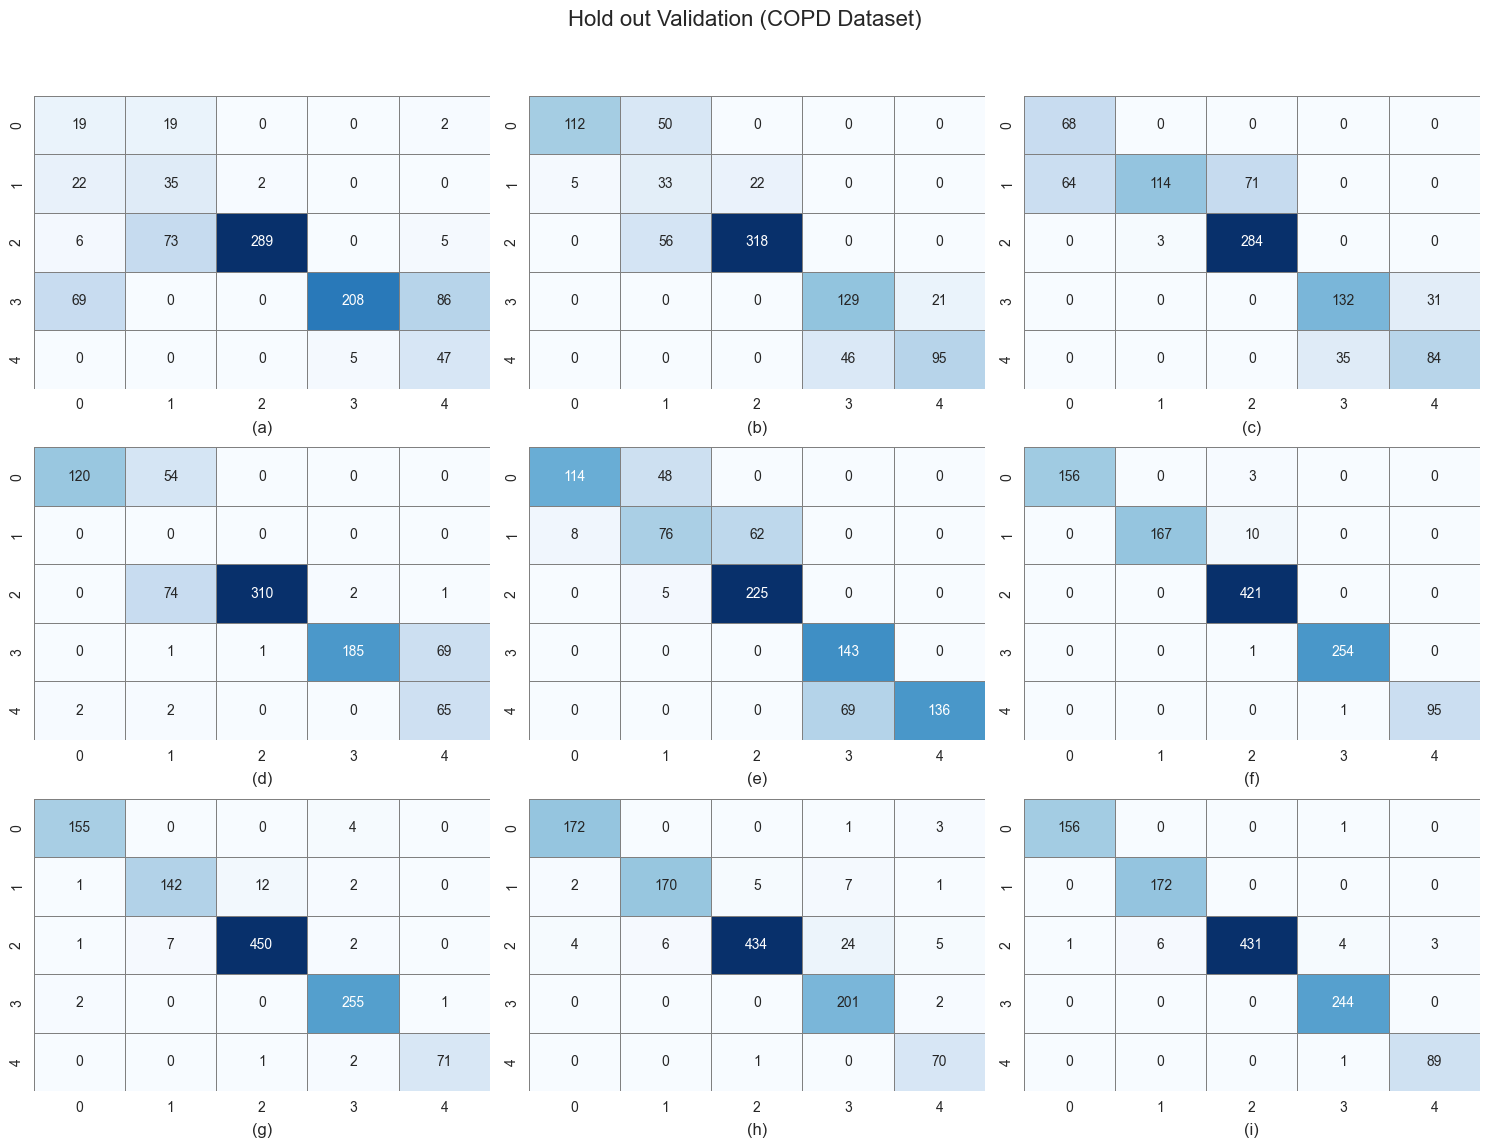

In [12]:
plot_confusion_matrices(3,3,sup_cfs)

In [8]:
cnn_lstm_cfs

array([[[ 19,  19,   0,   0,   2],
        [ 22,  35,   2,   0,   0],
        [  6,  73, 289,   0,   5],
        [ 69,   0,   0, 208,  86],
        [  0,   0,   0,   5,  47]],

       [[112,  50,   0,   0,   0],
        [  5,  33,  22,   0,   0],
        [  0,  56, 318,   0,   0],
        [  0,   0,   0, 129,  21],
        [  0,   0,   0,  46,  95]],

       [[ 68,   0,   0,   0,   0],
        [ 64, 114,  71,   0,   0],
        [  0,   3, 284,   0,   0],
        [  0,   0,   0, 132,  31],
        [  0,   0,   0,  35,  84]],

       [[120,  54,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,  74, 310,   2,   1],
        [  0,   1,   1, 185,  69],
        [  2,   2,   0,   0,  65]],

       [[114,  48,   0,   0,   0],
        [  8,  76,  62,   0,   0],
        [  0,   5, 225,   0,   0],
        [  0,   0,   0, 143,   0],
        [  0,   0,   0,  69, 136]]], dtype=int64)

In [9]:
fddlm_cfs

array([[[156,   0,   3,   0,   0],
        [  0, 167,  10,   0,   0],
        [  0,   0, 421,   0,   0],
        [  0,   0,   1, 254,   0],
        [  0,   0,   0,   1,  95]],

       [[155,   0,   0,   4,   0],
        [  1, 142,  12,   2,   0],
        [  1,   7, 450,   2,   0],
        [  2,   0,   0, 255,   1],
        [  0,   0,   1,   2,  71]],

       [[172,   0,   0,   1,   3],
        [  2, 170,   5,   7,   1],
        [  4,   6, 434,  24,   5],
        [  0,   0,   0, 201,   2],
        [  0,   0,   1,   0,  70]],

       [[156,   0,   0,   1,   0],
        [  0, 172,   0,   0,   0],
        [  1,   6, 431,   4,   3],
        [  0,   0,   0, 244,   0],
        [  0,   0,   0,   1,  89]]], dtype=int64)